<a href="https://colab.research.google.com/github/a-forty-two/DFE6/blob/main/BreastCancerAnalysis_ML_Hello_World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/cylons/master/data.csv', header=0 )

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.shape

(569, 33)

In [ ]:
# cardinality and null values

# null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# cardinality - count of unique values in a column
for cname in data.columns:
  print(cname + " : " + str(data[cname].value_counts().count()))

id : 569
diagnosis : 2
radius_mean : 456
texture_mean : 479
perimeter_mean : 522
area_mean : 539
smoothness_mean : 474
compactness_mean : 537
concavity_mean : 537
concave points_mean : 542
symmetry_mean : 432
fractal_dimension_mean : 499
radius_se : 540
texture_se : 519
perimeter_se : 533
area_se : 528
smoothness_se : 547
compactness_se : 541
concavity_se : 533
concave points_se : 507
symmetry_se : 498
fractal_dimension_se : 545
radius_worst : 457
texture_worst : 511
perimeter_worst : 514
area_worst : 544
smoothness_worst : 411
compactness_worst : 529
concavity_worst : 539
concave points_worst : 492
symmetry_worst : 500
fractal_dimension_worst : 535
Unnamed: 32 : 0


In [ ]:
# how many values do we have in Diagnosis column?
# LABEL COLUMN

data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

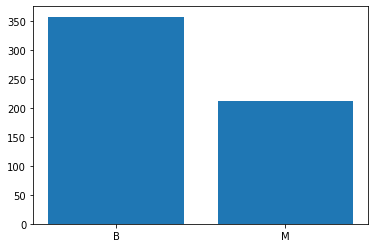

In [ ]:
# distribution
import matplotlib.pyplot as plt
plt.figure()
m_and_b_counts = data['diagnosis'].value_counts()
plt.bar(m_and_b_counts.index,m_and_b_counts )
plt.show()

In [ ]:
data.set_index('id', inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# which columns to go for?
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [60]:
# for the sake of simplicity- let's pick only _mean value columns
x = data.iloc[:, 1:11]
y = data.loc[:, ['diagnosis']]
# from this, our objective is to form y = mx + c
# where m and x will be calc by ML
# y and x we will provide to algo!

In [ ]:
# NORMALIZE 
# Z-Score = (data-mean)/std (-3,3)
# MinMax -> (data-min)/(max-min) (0,1)

# let's use Z-Score

# We divide our data into TRAINING and TESTING
# the idea is that whatever values we pick for training should work for testing ALSO
# HENCE- mean and std will be calculated ONLY for training data
# same mean and std will also be used for testing data!

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain,ytest = train_test_split(x, y, test_size=0.2)

# training > testing
# no unique situation in testing-> 

# label-> animal, bird, item, none
# training-> animal, bird, none 
# testing-> all 4



In [ ]:
ytrain

,diagnosis
id,
9113846,B
90944601,B
90401602,B
9113455,B
901041,B
...,...
857637,M
8510653,B
903483,B


In [ ]:
# mu and sigma (mean and std)
xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,455.0,14.063864,3.447247,6.98100,11.69500,13.38000,15.750000,27.42000
texture_mean,455.0,19.364769,4.247567,9.71000,16.21000,19.02000,21.750000,39.28000
perimeter_mean,455.0,91.551121,23.742459,43.79000,75.26500,86.34000,103.650000,186.90000
area_mean,455.0,647.499560,339.986425,143.50000,420.05000,546.30000,773.800000,2501.00000
smoothness_mean,455.0,0.096446,0.014144,0.05263,0.08590,0.09639,0.105400,0.16340
compactness_mean,455.0,0.104855,0.051945,0.01938,0.06633,0.09509,0.130550,0.34540
concavity_mean,455.0,0.088587,0.078711,0.00000,0.02991,0.06155,0.131300,0.42680
concave points_mean,455.0,0.048419,0.037872,0.00000,0.01988,0.03483,0.073820,0.20120
symmetry_mean,455.0,0.181325,0.027183,0.10600,0.16235,0.17940,0.195300,0.30400
fractal_dimension_mean,455.0,0.062950,0.007152,0.04996,0.05775,0.06183,0.066455,0.09744


In [ ]:
stats = xtrain.describe().T
xmean = stats['mean'] 
xstd = stats['std']
xmean, xstd

(radius_mean                14.063864
 texture_mean               19.364769
 perimeter_mean             91.551121
 area_mean                 647.499560
 smoothness_mean             0.096446
 compactness_mean            0.104855
 concavity_mean              0.088587
 concave points_mean         0.048419
 symmetry_mean               0.181325
 fractal_dimension_mean      0.062950
 Name: mean, dtype: float64, radius_mean                 3.447247
 texture_mean                4.247567
 perimeter_mean             23.742459
 area_mean                 339.986425
 smoothness_mean             0.014144
 compactness_mean            0.051945
 concavity_mean              0.078711
 concave points_mean         0.037872
 symmetry_mean               0.027183
 fractal_dimension_mean      0.007152
 Name: std, dtype: float64)

In [ ]:
norm_xtrain = (xtrain - xmean) /xstd
norm_xtest = (xtest - xmean)/ xstd

In [ ]:
norm_xtest.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
9112366,-0.706031,2.336686,-0.702586,-0.683555,-0.203304,-0.367978,-0.215820,-0.745894,-0.052441,-0.180401
899987,3.384189,-0.448438,3.481058,4.007514,1.304741,2.530479,3.153489,3.772738,0.525128,-0.243318
869691,-0.656716,-0.655615,-0.529057,-0.633848,0.894677,1.254126,0.982242,0.679430,3.181210,1.504370
903516,2.189033,0.686330,2.225923,2.233914,1.432002,1.999147,2.444562,2.845934,1.282958,0.434785
905686,-0.630609,0.425003,-0.638566,-0.628553,0.090811,-0.455378,-0.800875,-0.703119,0.756892,-0.007031


In [ ]:
ytrain.head()

,diagnosis
id,
9113846,B
90944601,B
90401602,B
9113455,B
901041,B


In [ ]:
# our Y is still M and B
# ML has no idea what M and B is
# but ML knows what 0 and 1 is!
# we intend to detect 'M' cancer - 1
# we can keep the 'B' cancer - 0
convert_diagnosis = lambda d : 1 if d=='M' else 0 

ytrain_encoded = ytrain['diagnosis'].map(convert_diagnosis)
ytest_encoded = ytest['diagnosis'].map(convert_diagnosis)

In [ ]:
print(ytrain_encoded.tail(10))

id
89511502    0
857343      0
924964      0
86973701    0
9113239     0
857637      1
8510653     0
903483      0
84667401    1
904969      0
Name: diagnosis, dtype: int64


In [ ]:
# my x values are NORMALIZED
# my y values are INT and NO LONGER strings!
# DATA is ready for ML!

In [62]:
# Define Algorithm
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# train
model.fit(norm_xtrain, ytrain_encoded)

# testing/scoring
predictions = model.predict(norm_xtest)

# evaluation
from sklearn.metrics import accuracy_score
accuracy_score(predictions, ytest_encoded)

0.9035087719298246

In [64]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
# train
model2.fit(norm_xtrain, ytrain_encoded)

# testing/scoring
predictions = model2.predict(norm_xtest)

# evaluation
from sklearn.metrics import accuracy_score
accuracy_score(predictions, ytest_encoded)

0.9298245614035088

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
# HYPERPARAMETERS-> these are 2 diff HPs for Random Forest 
# SAME algo could also give 2 diff models!
ntree1, ntree2 = 50,100
for algo in [RandomForestClassifier(n_estimators=ntree1), RandomForestClassifier(n_estimators=ntree2), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(), LinearSVC()]:
  model = algo
  model.fit(norm_xtrain, ytrain_encoded)
  predictions = model.predict(norm_xtest)
  print(accuracy_score(predictions, ytest_encoded))

0.9298245614035088
0.9210526315789473
0.9298245614035088
0.9122807017543859
0.9736842105263158
0.9473684210526315


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
